Case study : Telecom Churn Data

***Objective :***
In this case study, participants will work in groups to predict whether customers will churn
(leave the telecom service) based on various customer data

In [209]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

warnings.filterwarnings('ignore')

# Data Exploration and Preprocessing

In [210]:
# Read Dataset
df = pd.read_csv('Telco_Customer_Churn - Telco_Customer_Churn.csv')

In [211]:
# View dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


.info() tells that dataset have total 21 columns and 7043 observations. 2 columns have float datatype, 2 columns have integer datatype and 17 columns have object datatype

In [213]:
df.describe() 
# explains the statistical details of nummeric comlumns in the dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [214]:
# explains the details of object type columns in the dataset
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [215]:
# Check shape of dataset
df.shape

(7043, 21)

# Data Cleaning

# 1) Check Missing Values

In [216]:
# Check for missing value sin dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It explains that Total Charges column contain 11 mising values. 
First we Impute these missing values
To impute missing values we will check that wheather the TotalChrages column is normaly distibuted or not

<Axes: >

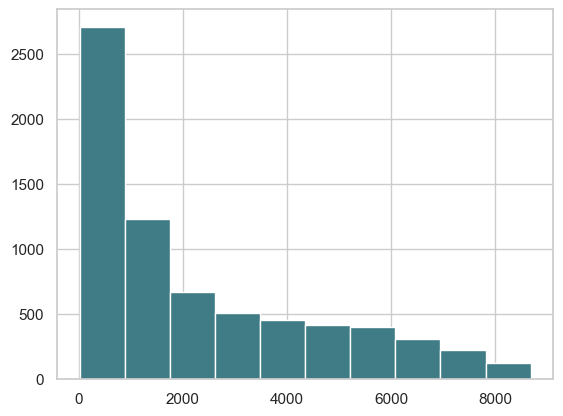

In [217]:
df['TotalCharges'].hist()

# Dealing with Missing Values

Distribution of TotalCharges column is not bell shaped so we impute missing values with the median of TotalCharges column

In [218]:
 # Impute missing values with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.isnull().sum() # No missing values in the datset after imputation

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2) Checking Duplicate Rows

In [219]:
# Check for Duplicate rows
df.duplicated().sum()
# No duplicate rows in a datset


0

In [220]:
# Dropping customer id column from datset,as it contain alpha nummeric values and its is not helpful for the model
df = df.drop('customerID', axis=1)


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [222]:
# observe unique values in each column to determine whether the column is nummeric or categorical
# IF column is nummric then check the distrinution of datset i.e Normal or not


dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


Above output explains that 'Tenure ', 'MonthlyCharges' and 'TotalCharges' columns have nummeric continous data. So we will check the distribution of these columns. 'Senior Citizen' column have nummeric categorical data.

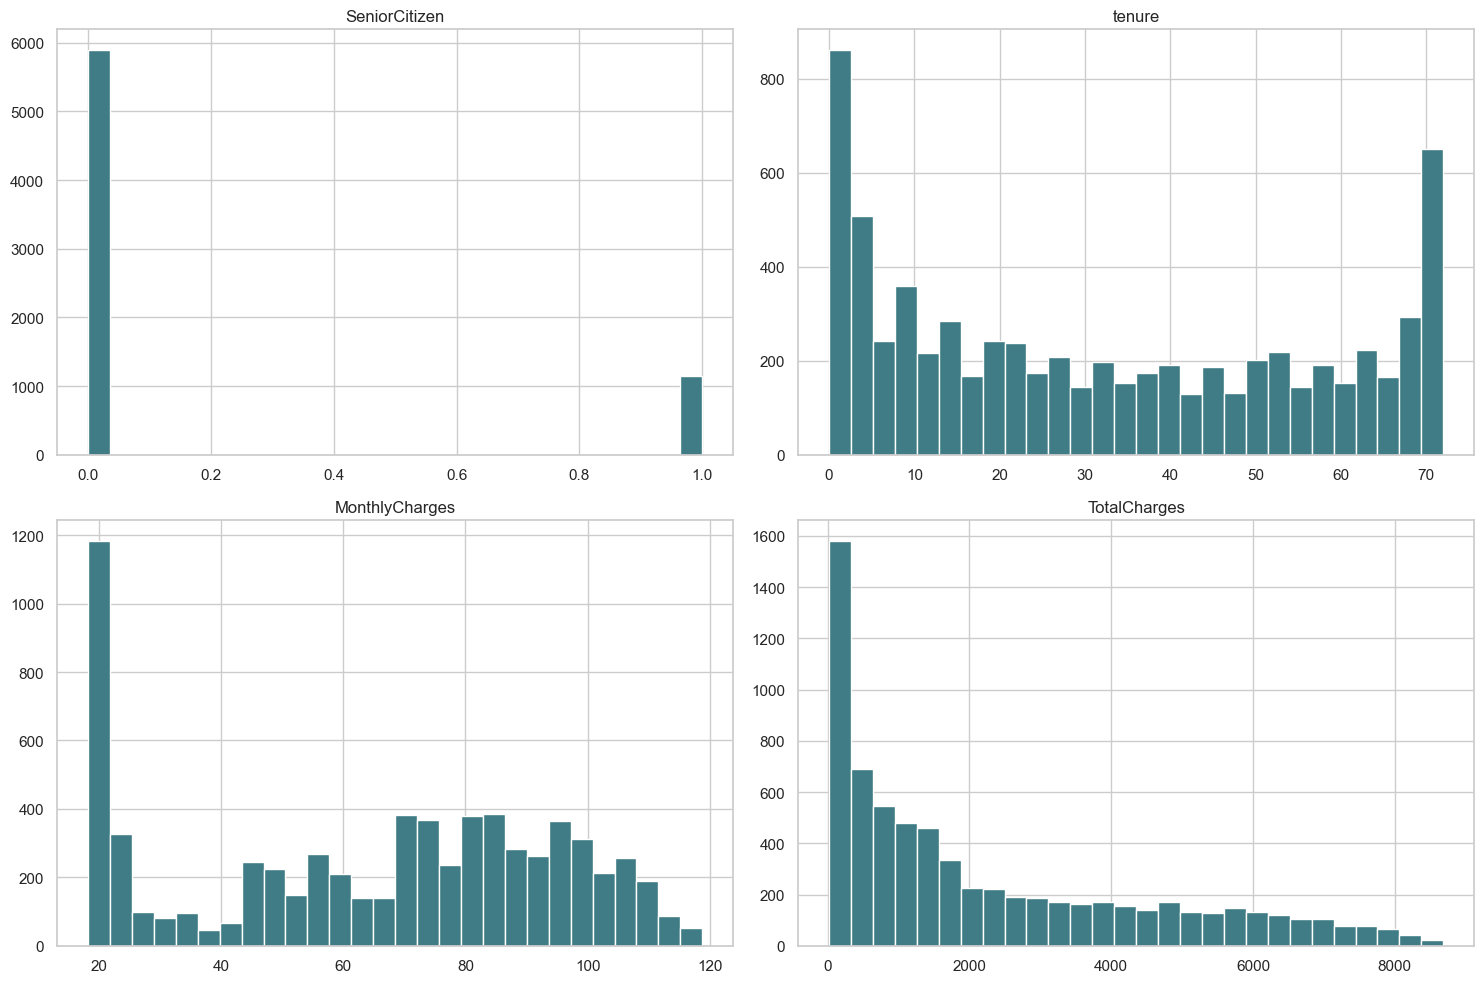

In [223]:
df.hist(figsize=(15,10), bins=28)
plt.tight_layout()
plt.show()

As the above plot shows that all nummeric columns have non normalized data (No bell shaped data) so we detect outliers by using Tukey IQR detection method

# 3) Outlier Detection

In [224]:
df_columns = df[['tenure','MonthlyCharges','TotalCharges']]

def detect_outliers_iqr(df_columns):
    # Select numeric columns
    numeric_columns = df_columns
    
    outliers = {}
    
    for column in numeric_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    
    return outliers


outliers = detect_outliers_iqr(df_columns)

# Print results
for column, indices in outliers.items():
    print(f"Column '{column}' has {len(indices)} outliers at indices: {indices}")

Column 'tenure' has 0 outliers at indices: []
Column 'MonthlyCharges' has 0 outliers at indices: []
Column 'TotalCharges' has 0 outliers at indices: []


<Axes: >

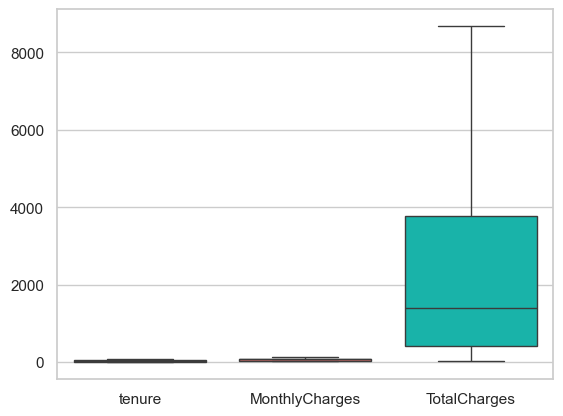

In [225]:
# Another way to check Outliers 
sns.boxplot(df_columns)

 Above plot depicts that there are **NO OUTLIERS** in nummeric columns of dataset.

In [226]:
# observe unique values in each column to determine whether the column is nummeric or categorical
# IF column is categorical then check wheather it is ordinal or nominal

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


Identify categorical Columns and also identify wheather they are nominal and ordinal based on my intution about dataset
1) Gender ( Nominal)
2) Senior Citizen (Nominal)
3) Partner (Nominal)
4) Dependents (Nominal)
   
5) PhoneService (Nominal)
6) MultipleLines (Nominal)
   
7) InternetService (Nominal)
8) OnlineSecurity (Nominal)
9)  OnlineBackup	(Nominal)
10) DeviceProtection (Nominal)
11) TechSupport	(Nominal)
12) StreamingTV	(Nominal)
13) StreamingMovies	(Nominal)
14) Contract	(Nominal)
15) PaperlessBilling	(Nominal)
16) PaymentMethod	 (Nominal)



<Axes: xlabel='MultipleLines', ylabel='count'>

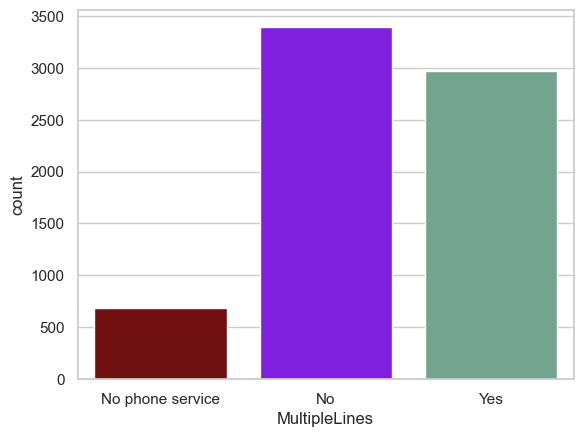

In [227]:
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
df['MultipleLines'].value_counts()
data = df['MultipleLines']
sns.countplot(data= df,x='MultipleLines',palette=color_palette)

In [228]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [229]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [230]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [231]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [232]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [233]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [234]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [235]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [236]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [237]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [238]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Univariate Analysis of Output Feature

<Axes: xlabel='Churn', ylabel='count'>

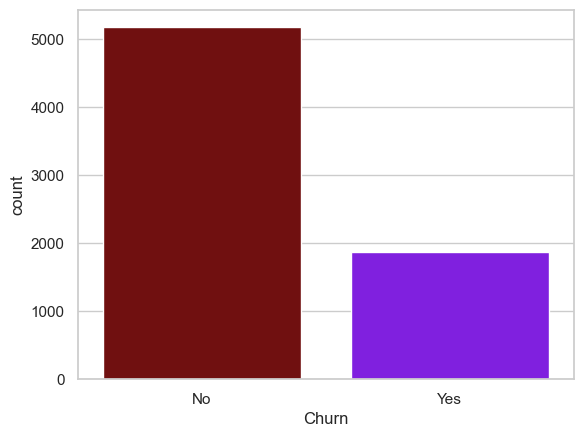

In [239]:
# Output Feature 
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
df['Churn'].value_counts()
sns.countplot(data= df,x='Churn',palette=color_palette)

**Observation** :
Dataset indicte that almost 5100 people has not left the service while 1900 people has left the service


# Feature Engineering

# Encoding

**Observation** 

While screening columns, I observed that  multiple columns (OnlineSecurity,  OnlineBackup , Device protection , Tech Support, Streaming tv, Streaming movies) have the same "No internet service" category, and this category is repeated across these columns, it can lead to redundancy in the one-hot encoded data. This redundancy not only increases the dimensionality of the dataset unnecessarily but also potentially introduces multicollinearity. Here's how we handled this situation more efficiently.

In [240]:

# List of columns with 'No internet service'
internet_dependent_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Function to recode the internet-dependent services
def recode_service(x):
    if x == 'No internet service':
        return 'No'
    return x

# Recode the internet-dependent services
for col in internet_dependent_services:
    df[col] = df[col].apply(recode_service)

# Create a new column to capture 'No internet service'
df['HasInternetService'] = np.where(df['InternetService'] != 'No', 'Yes', 'No')

# Now perform one-hot encoding
columns_to_encode = [
    'gender','SeniorCitizen','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'HasInternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

# Check the new column names
print(df_encoded.columns)


   tenure  MonthlyCharges  TotalCharges Churn  gender_Female  gender_Male  \
0       1           29.85         29.85    No           True        False   
1      34           56.95       1889.50    No          False         True   
2       2           53.85        108.15   Yes          False         True   
3      45           42.30       1840.75    No          False         True   
4       2           70.70        151.65   Yes           True        False   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  ...  \
0             True            False       False         True  ...   
1             True            False        True        False  ...   
2             True            False        True        False  ...   
3             True            False        True        False  ...   
4             True            False        True        False  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True     

In [241]:
# Convert bool to int
df_encoded[df_encoded.select_dtypes(include=['bool']).columns] = df_encoded.select_dtypes(include=['bool']).astype('int32')

In [242]:
# Convert output feature to Int 
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

In [243]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   int32  
 5   gender_Male                              7043 non-null   int32  
 6   SeniorCitizen_0                          7043 non-null   int32  
 7   SeniorCitizen_1                          7043 non-null   int32  
 8   Partner_No                               7043 non-null   int32  
 9   Partner_Yes                              7043 non-null   int32  
 10  Dependents_No                            7043 no

After Encoding (Catrgorical to Nummerical Conversion), the total no of columns will become 43

# Model Training

### Splitting DataSet into training and testing sets

In [244]:
# Separating features and target variable
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)



### Scaling the features

In [245]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying ***KNN Classifier*** and make Predictions

In [246]:
# Applying the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)

print(classification_rep)

0.7643718949609652
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1046
           1       0.55      0.49      0.52       363

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.76      0.76      0.76      1409



***Observation** : KNN Classifier gives 76 % model accuracy. We will improve this model accuracy by hyperparameter tunning (Elbow method) and then we will check the improvement in the performace of model

In [247]:
# Function to train KNN with a specified k value
def train_knn_with_k(k_value):
    # Train the KNN model with a specified value of K
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train_scaled, y_train)
    
    # Predict using the trained model
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    return knn, accuracy, classification_rep


# Function to find the best k value based on accuracy with seaborn plot
def plot_accuracy_vs_k_seaborn(max_k=20):
    accuracies = []
    k_values = range(1, max_k+1)
    
    for k in k_values:
        _, accuracy, _ = train_knn_with_k(k)
        accuracies.append(accuracy)
    
    # Create a dataframe for plotting
    accuracy_df = pd.DataFrame({'K': k_values, 'Accuracy': accuracies})
    
    # Plotting using seaborn
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='K', y='Accuracy', data=accuracy_df, marker='o')
    plt.title('KNN Accuracy for different K values')
    plt.xlabel('K value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
    
    # Return the best k value and its accuracy
    best_k = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]['K']
    best_accuracy = accuracy_df['Accuracy'].max()
    
    return best_k, best_accuracy


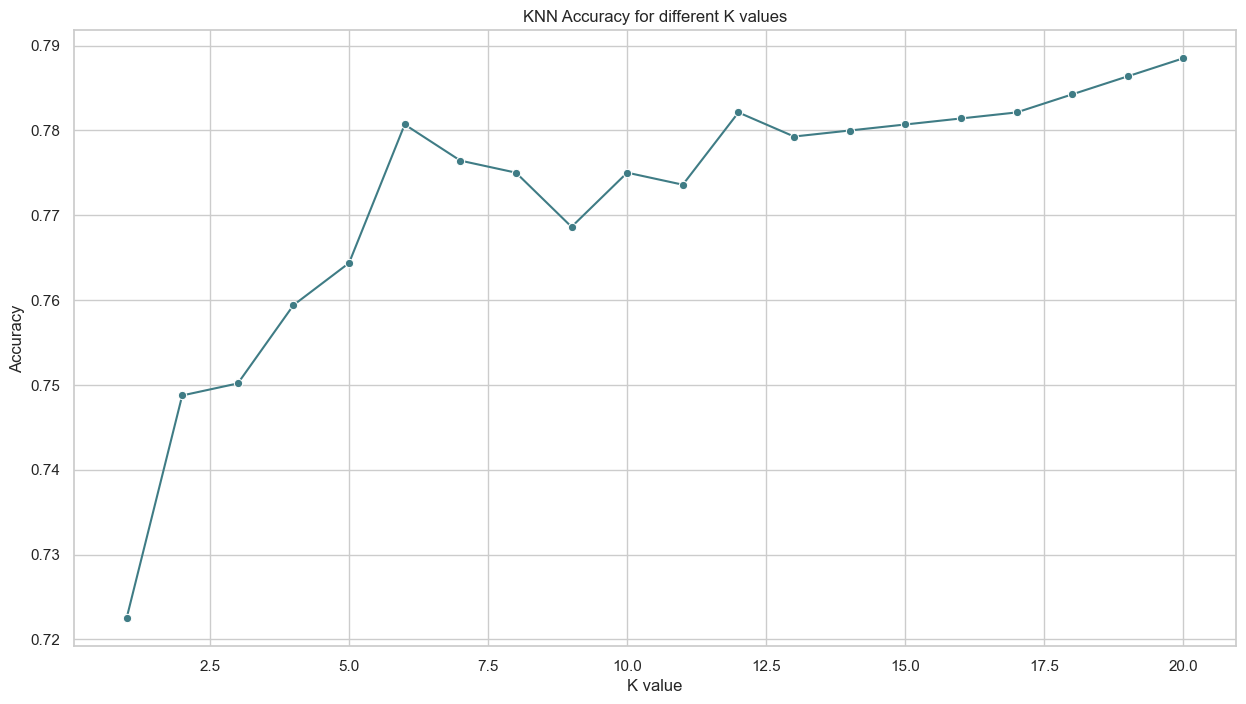

In [248]:
# Plotting the accuracy vs. k using seaborn
best_k_seaborn, best_accuracy_seaborn = plot_accuracy_vs_k_seaborn(20)

In [249]:
best_k_seaborn, best_accuracy_seaborn

(20.0, 0.7885024840312278)

Confusion Matrix for KNN 

<Axes: >

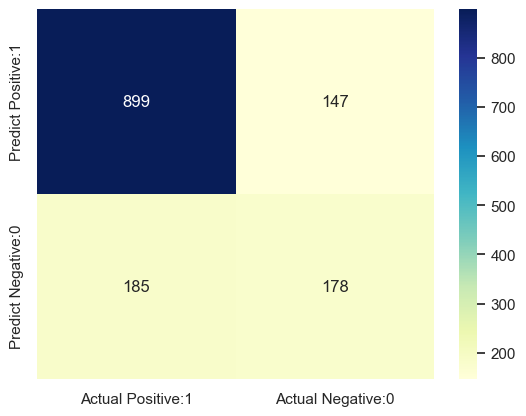

In [250]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report

In [251]:
knn_model_k, accuracy_k, classification_report_k = train_knn_with_k(20)

print(accuracy_k)
print(classification_report_k)

0.7885024840312278
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1046
           1       0.60      0.53      0.56       363

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



We found bit improvemet in the accuracy of KNN to 79 % by tunning the value of k to 20.

In [252]:
def predict_churn_with_best_k(input_data):
    # Scale the input data
    input_data_scaled = scaler.transform([input_data])
    
    # Predict using the trained model with the best k value
    prediction = knn_model_k.predict(input_data_scaled)
    
    # Return the result
    return "Churn" if prediction[0] == 1 else "No Churn"

# Example usage:
# To predict, you would pass a list of values in the order of the features:
# predict_heart_disease_with_best_k([age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall])

# Sample input for testing with the best KNN model
x = X_test.iloc[808]
predict_churn_with_best_k(x)

'No Churn'

### Applying ***Naive Bayes Classifier*** and make predictions

Spliting dataset in training and testing

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Feature Scaling

In [254]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Naive Bayes Model Training

In [255]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

Predict results

In [256]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

Check accuracy Score

In [257]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7345


Compare the train and test set accuracy


In [258]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7428


Check for Overfitting and Underfitting

In [259]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7428
Test set score: 0.7345


The training-set accuracy score is 0.7428 while the test-set accuracy to be 0.7345. These two values are quite comparable. So, there is no sign of overfitting. 

Compare Model Accuracy will NULL Accuracy

In [260]:
y_test.value_counts()


Churn
0    1560
1     553
Name: count, dtype: int64

In [261]:
null_accuracy = (1560/(1560+553))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7383


***Observation*** : Our Naiye bayes model acccuracy is 0.7345 and null accuracy is 0.7383 which is less than null accuracy. So naiye baye model is not performing well for predicting the labels

Confusion Matrix for Naiye Bayes Classifier

<Axes: >

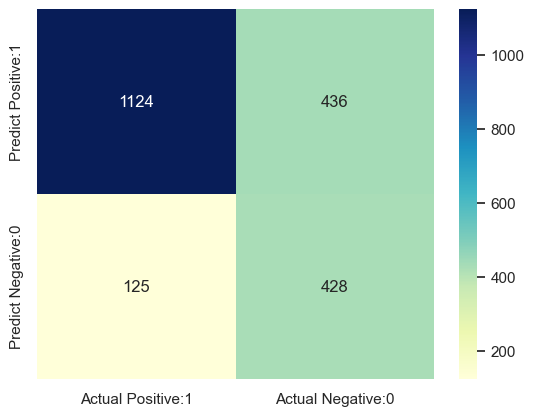

In [262]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

The confusion matrix shows `1124 + 428 = 1552 correct predictions` and `436 + 125 = 561 incorrect predictions`.

Classification report

In [263]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1560
           1       0.50      0.77      0.60       553

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.73      0.75      2113



### Applying ***Random Forest Classfier***

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [265]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=4, verbose=True, n_estimators=200, max_depth=10, criterion='gini')

In [266]:
model.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=4, verbose=True)

Check Accuracy Score of Random forest Classifier

In [267]:
model.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


0.8002839564600095

***Observation*** : Accuracy of Random Forest Classfier is 80.5% . which is best than KNN , Naive Bayes Classification Algorithms

Confusion matrix for Random forest Classfier

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


<Axes: >

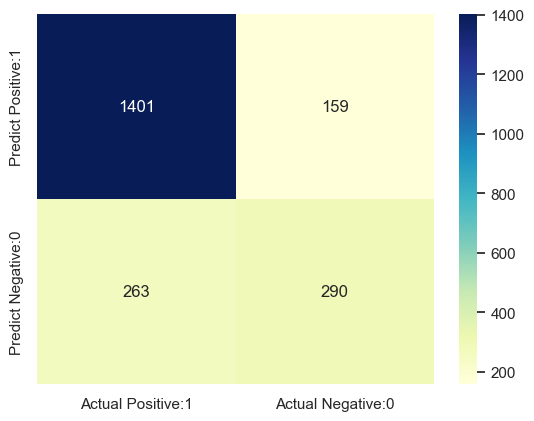

In [268]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report

In [269]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.52      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



We have changed n_estimators from 200 to [100 300 400] and max_depth from  10 to [5 20 30], but it doesnot improve the accuracy very much above thann 80 %

# Model Evaluation

A high recall indicates that the model captures most churners.
A high precision indicates that most predicted churners are indeed churners.


In [270]:
# Initialize the models
knn = KNeighborsClassifier(n_neighbors=20)
nb = GaussianNB()
rf = RandomForestClassifier(n_jobs=4, verbose=True, n_estimators=200, max_depth=10, criterion='gini')

# Fit the models
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
rf.fit(X_train, y_train)


knn_preds = knn.predict(X_test)
nb_preds = nb.predict(X_test)
rf_preds = rf.predict(X_test)


from sklearn.metrics import classification_report

# Evaluate KNN
print("KNN Classification Report:")
print(classification_report(y_test, knn_preds))

# Evaluate Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds))

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1560
           1       0.66      0.37      0.47       553

    accuracy                           0.79      2113
   macro avg       0.73      0.65      0.67      2113
weighted avg       0.77      0.79      0.76      2113

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1560
           1       0.50      0.78      0.61       553

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.75      2113

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.64      0.51      0.57       553

    accuracy                           0.80      2113
   macro avg       0.74      

Precision of Non Churners(0) for Naive Bayes Algo is Highest (0.91) followed by Random forest (0.84) and then knn(0.81) which high precison indicates that predicted non churners are indeed non churners.

# Comparison and Discussion

Wheras the model accuracy of Random forest classfier after hyperparamter tunning is highest(80.2%) , followed by KNN with 79% accuracy and Naive Bayes have least model accuracy which is 73.45%. Least accuracy of Naive Bayes is due to the high cardinality of Dataset and due to the Imbalance of Output Churn feature

# 5: Presentation

***Findings*** : This dataset is about the people who will keep telecom services(Not Churn) and leave the Telcom company (Churn) based on the inputs and services of that company

It was a much cleaned dataset with 7043 observations and 21 features.
Only one column has missing values
So we impute these missing values
The dataset doesnt contain any outlier

***Challenges faced*** :
We faced challenges during encoding. AS we have observed the repetition of no service privider cqtegory in the 6 consectives columsn with same values. So we deal with it

Overall Random forest Classfier performed well and KNN also performed well .